In [1]:
from google.colab import drive
# 挂载谷歌云盘
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# 定义文件路径
file_path = '/content/drive/MyDrive/reassignment/reassignment_eeFirm_invorScore_eeAssigneeScore.csv'

# 使用read_csv加载指定的列
df = pd.read_csv(file_path)


<ipython-input-2-1f548de3f225>:7: DtypeWarning: Columns (6,18,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [3]:
print(df.columns)

Index(['rf_id', 'file_id', 'cname', 'caddress_1', 'caddress_2', 'caddress_3',
       'caddress_4', 'reel_no', 'frame_no', 'convey_text', 'record_dt',
       'last_update_dt', 'page_count', 'purge_in', 'convey_ty',
       'employer_assign', 'or_name', 'exec_dt', 'ack_dt', 'title', 'lang',
       'appno_doc_num', 'appno_date', 'appno_country', 'pgpub_doc_num',
       'pgpub_date', 'pgpub_country', 'grant_doc_num', 'grant_date',
       'grant_country', 'ee_name', 'ee_address_1', 'ee_address_2', 'ee_city',
       'ee_state', 'ee_postcode', 'ee_country', 'index', 'ee_country_full',
       'standard_name_ee', 'asstype_firm_ee', 'asstype_indiv_ee',
       'asstype_government_ee', 'asstype_hosp_ee', 'asstype_university_ee',
       'asstype_institute_ee', 'uspto_StandardName', 'uspto_StemName',
       'index_eeFirm', 'inventor_name', 'standard_inventor_name',
       'standard_or_name', 'max_similarity_invor', 'max_inventor',
       'StandardAssignee_patentsview', 'max_similarity_eeAssignee',
  

In [4]:
# 计算 df 中 ee_name 列的缺失值数量
missing_values_count = df['or_name'].isna().sum()
# 打印结果
print(f"Number of missing values in 'or_name': {missing_values_count}")

Number of missing values in 'or_name': 0


In [5]:
# 计算 df 中 ee_name 列空字符串的数量
empty_string_count = (df['or_name'] == '').sum()
# 打印结果
print(f"Number of empty strings in 'or_name': {empty_string_count}")

Number of empty strings in 'or_name': 0


In [6]:
# 对一个字段操作前的基本步骤：
df['or_name'] = df['or_name'].astype(str).str.strip()


In [7]:
print(len(df))

1644387


In [8]:
# 创建 standard_name 变量，将其值设置为 ee_name 变量的值
df['standard_name'] = df['or_name']

In [9]:
import pandas as pd

# 假设df已经被加载到您的环境中

# 步骤1: 如果standard_name开头和结尾存在空格，则删除
df['standard_name'] = df['standard_name'].str.strip()

# 步骤2: 为standard_name的开头和结尾增加一个空格
df['standard_name'] = ' ' + df['standard_name'] + ' '

df[['standard_name', 'or_name']].head()


,standard_name,or_name
0,LADT CARROLL H.,LADT CARROLL H.
1,JENSEN LEIF,JENSEN LEIF
2,JENSEN LEIF,JENSEN LEIF
3,PIZZICONI VINCENT B.,PIZZICONI VINCENT B.
4,KANEKO TOMONOBU,KANEKO TOMONOBU


In [10]:
# 使用str.replace()方法替换第一次出现的"-CONN."为""
df['standard_name'] = df['standard_name'].str.replace("-CONN.", "", n=1, regex=False)

In [11]:
# 使用str.replace()方法替换所有的";"为" ; "
df['standard_name'] = df['standard_name'].str.replace(";", " ; ", regex=False)

In [12]:
# 将 'standard_name' 列的所有值转换为大写
df['standard_name'] = df['standard_name'].str.upper()
# 检查结果
df[['standard_name', 'or_name']].head()

,standard_name,or_name
0,LADT CARROLL H.,LADT CARROLL H.
1,JENSEN LEIF,JENSEN LEIF
2,JENSEN LEIF,JENSEN LEIF
3,PIZZICONI VINCENT B.,PIZZICONI VINCENT B.
4,KANEKO TOMONOBU,KANEKO TOMONOBU


In [13]:
df.head(5)

,rf_id,file_id,cname,caddress_1,caddress_2,caddress_3,caddress_4,reel_no,frame_no,convey_text,...,index_eeFirm,inventor_name,standard_inventor_name,standard_or_name,max_similarity_invor,max_inventor,StandardAssignee_patentsview,max_similarity_eeAssignee,max_Assignee,standard_name
0,38370429,1.0,"LOWE, KING, PRICE & BECKER",2001 JEFF. DAVIS HWY.,"ARLINGTON, VA 22202",NaN,NaN,3837.0,429.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,0,"Ladt, Carroll H.",LADT CARROLL H,LADT CARROLL H,1.000000,LADT CARROLL H,PEBCO INC,0.573333,PEBCO INC,LADT CARROLL H.
1,38670514,1.0,LAWRENCE ROSEN,260 MADISON AVE.,"NEW YORK, NY 10016",NaN,NaN,3867.0,514.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,1,"Jensen, Leif Moeller",JENSEN LEIF MOELLER,JENSEN LEIF,0.816667,JENSEN LEIF MOELLER,ROCKWOOL INT AS,1.000000,ROCKWOOL INT AS,JENSEN LEIF
2,38670514,1.0,LAWRENCE ROSEN,260 MADISON AVE.,"NEW YORK, NY 10016",NaN,NaN,3867.0,514.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,2,"Jensen, Leif Moeller",JENSEN LEIF MOELLER,JENSEN LEIF,0.816667,JENSEN LEIF MOELLER,ROCKWOOL INT AS,1.000000,ROCKWOOL INT AS,JENSEN LEIF
3,38790584,1.0,HARRY M. WEISS,4204 NORTH BROWN,"SCOTTSDALE, AZ 85251",NaN,NaN,3879.0,584.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,3,"Dorson, Jr., William J.; Pizziconi, Vincent B.",DORSON JR WILLIAM J; PIZZICONI VINCENT B,PIZZICONI VINCENT B,1.000000,PIZZICONI VINCENT B,BIOMEDICAL LABS,0.688370,BIOMEDICAL LABS,PIZZICONI VINCENT B.
4,38840232,1.0,MAURICE E. GAUTHIER,225 FRANKLIN ST.,"BOSTON, MASS. 02110",NaN,NaN,3884.0,232.0,ASSIGNMENT OF ASSIGNORS INTEREST.,...,4,"Kaneko, Tomonobu",KANEKO TOMONOBU,KANEKO TOMONOBU,1.000000,KANEKO TOMONOBU,AMADA CO LTD,0.614384,AMADA CO LTD,KANEKO TOMONOBU


In [14]:
# 使用apply函数遍历每个元素，对'standard_name'列中满足条件的字符串进行修改
df['standard_name'] = df['standard_name'].apply(lambda x: x[:-5] if x.endswith('(THE)') else x)
# 使用apply函数遍历每个元素，对'standard_name'列中满足条件的字符串进行修改
df['standard_name'] = df['standard_name'].apply(lambda x: x[4:] if x.startswith('THE ') else x)

In [15]:
# 替换standard_name列中的所有单引号(')为无（即删除它们）
df['standard_name'] = df['standard_name'].str.replace("'", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("^", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("<", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(".", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("`", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("_", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(">", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("''", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("!", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("+", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("?", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("(", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("{", "", regex=False)

df['standard_name'] = df['standard_name'].str.replace("\\", "", regex=False)

df['standard_name'] = df['standard_name'].str.replace(")", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("$", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("}", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("|", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(",", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("%", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("[", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("*", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("]", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("@", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(":", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("~", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("#", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace(" AND ", " ", regex=False)
df['standard_name'] = df['standard_name'].str.replace(" & ", " ", regex=False)
df['standard_name'] = df['standard_name'].str.replace(";", "", regex=False)
df['standard_name'] = df['standard_name'].str.replace("/", " ", regex=False)
df['standard_name'] = df['standard_name'].str.replace("-", " ", regex=False)
df['standard_name'] = df['standard_name'].str.replace("  ", " ", regex=False)

In [16]:
# 检查结果
df[['standard_name', 'or_name']].head()

,standard_name,or_name
0,LADT CARROLL H,LADT CARROLL H.
1,JENSEN LEIF,JENSEN LEIF
2,JENSEN LEIF,JENSEN LEIF
3,PIZZICONI VINCENT B,PIZZICONI VINCENT B.
4,KANEKO TOMONOBU,KANEKO TOMONOBU


In [17]:
# 检查第二个样本的standard_name的值是否以空格开头
second_sample_starts_with_space = df['standard_name'].iloc[2].startswith(' ')

print(f"第二个样本的standard_name的值是否以空格开头: {second_sample_starts_with_space}")


第二个样本的standard_name的值是否以空格开头: True


In [18]:
import pandas as pd

# 检查'standard_name'列中是否存在字符串" RECH & DEV "
contains_string = df['standard_name'].str.contains(" RES & DEV ", na=False).any()

if contains_string:
    print("存在字符串' RES & DEV '")
else:
    print("不存在字符串' RES & DEV '")


不存在字符串' RES & DEV '


In [19]:
import pandas as pd

# 检查'standard_name'列中是否存在字符串" RECH & DEV "
contains_string = df['standard_name'].str.contains(" RECH & DEV ", na=False).any()

if contains_string:
    print("存在字符串' RECH & DEV '")
else:
    print("不存在字符串' RECH & DEV '")


不存在字符串' RECH & DEV '


In [20]:
df[['standard_name', 'or_name']].head()


,standard_name,or_name
0,LADT CARROLL H,LADT CARROLL H.
1,JENSEN LEIF,JENSEN LEIF
2,JENSEN LEIF,JENSEN LEIF
3,PIZZICONI VINCENT B,PIZZICONI VINCENT B.
4,KANEKO TOMONOBU,KANEKO TOMONOBU


In [21]:
# 检查第二个样本的standard_name的值是否以空格开头
second_sample_starts_with_space = df['standard_name'].iloc[1].startswith(' ')

print(f"第二个样本的standard_name的值是否以空格开头: {second_sample_starts_with_space}")


第二个样本的standard_name的值是否以空格开头: True


In [22]:
pip install tqdm

In [23]:
from tqdm import tqdm
import pandas as pd

# 加载替换规则的Excel文件
rules_path = '/content/drive/MyDrive/addition_list/standard_name_list.xlsx'
rules_df = pd.read_excel(rules_path, sheet_name='Sheet1')

# 假设df是您的DataFrame

# 使用tqdm库遍历所有替换规则，并逐一应用
for index, row in tqdm(rules_df.iterrows(), total=rules_df.shape[0]):
    initial_text = row['initial']  # 被替换的字符串
    replace_text = row['replace']  # 替换结果的字符串
    # 应用替换规则
    df['standard_name'] = df['standard_name'].str.replace(initial_text, replace_text, n=1, regex=False)

# 将这些列的数据导出到ZIP文件中
df.to_csv('/content/drive/MyDrive/reassignment/reassignment_orsector1.csv', index=False)
# 添加的打印语句
print("文件已成功保存到'/content/drive/MyDrive/reassignment/reassignment_orsector1.csv'")

100%|██████████| 832/832 [08:04<00:00,  1.72it/s]


文件已成功保存到'/content/drive/MyDrive/reassignment/reassignment_orsector1.csv'


In [ ]:
#3) standard_ee_name的sector识别；

In [24]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='corporates')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_firm1'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_firm1'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [25]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='corporates2')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_firm2'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_firm2'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [26]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='corporates3')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_firm3'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_firm3'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [27]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='corporates4')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_firm4'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_firm4'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [28]:
df['asstype_firm_or'] = (
    df['asstype_firm1'] | df['asstype_firm2'] | df['asstype_firm3'] | df['asstype_firm4']
).astype(int)

In [29]:
# 选择特定列并获取前20个样本
sample_data = df[['asstype_firm_or', 'standard_name', 'or_name']].head(20)

# 打印结果
sample_data


,asstype_firm_or,standard_name,or_name
0,1,LADT CARROLL H,LADT CARROLL H.
1,0,JENSEN LEIF,JENSEN LEIF
2,0,JENSEN LEIF,JENSEN LEIF
3,1,PIZZICONI VINCENT B,PIZZICONI VINCENT B.
4,0,KANEKO TOMONOBU,KANEKO TOMONOBU
5,0,HENVILLE MICHAEL I,HENVILLE MICHAEL I.
6,0,KESSLER BAYARD F,"KESSLER, BAYARD F."
7,0,OVREN CHRISTER,"OVREN, CHRISTER"
8,0,MASSON VIJAY,"MASSON, VIJAY"
9,0,OEDA YOSHITAKA,"OEDA, YOSHITAKA"


In [30]:
# 假设你的DataFrame是df，并且'asstype_firm'列已经根据你的条件被正确更新

# 计算'asstype_firm'为1的样本数
asstype_firm_count = df[df['asstype_firm_or'] == 1].shape[0]

# 计算总样本数
total_samples = df.shape[0]

# 计算占总样本的比例
proportion = asstype_firm_count / total_samples

print(f"'asstype_firm_or'为1的样本数: {asstype_firm_count}")
print(f"总样本数: {total_samples}")
print(f"'asstype_firm_or'为1的样本占比: {proportion:.2%}")


'asstype_firm_or'为1的样本数: 1473907
总样本数: 1644387
'asstype_firm_or'为1的样本占比: 89.63%


In [31]:
df['standard_name'] = df['standard_name'].str.replace("  ", " ", regex=False)

In [32]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='Individuals')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_indiv'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_indiv'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [33]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='Government')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_government_or'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_government_or'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [34]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='universities')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_univ'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_univ'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [35]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='universities2')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_univ2'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_univ2'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [36]:
# 使用正则表达式替换所有的" THE "为" "
df['standard_name'] = df['standard_name'].str.replace(" THE ", " ", regex=False)

In [37]:
import pandas as pd

# 假设df是您的DataFrame

# 创建新列asstype_inst，默认设置为0
df['asstype_inst'] = 0

# 特殊条件：同时包含"COUNCIL OF"和"RES"
df.loc[df['standard_name'].str.contains(" COUNCIL OF ", na=False) & df['standard_name'].str.contains(" RES ", na=False), 'asstype_inst'] = 1


In [38]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='Non-profit institutes')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_inst2'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_inst2'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [39]:
df['asstype_inst3'] = 0

# 更新asstype_inst3的值：如果standard_name包含" FOUND "，
# 且asstype_univ和asstype_univ2的值都不是1，则设置为1，否则为0
df['asstype_inst3'] = (
    df['standard_name'].str.contains(" FOUND ", na=False) &
    (df['asstype_univ'] != 1) &
    (df['asstype_univ2'] != 1)
).astype(int)


In [40]:
df['asstype_inst4'] = 0

# 更新asstype_inst4的值：如果standard_name包含" INST "，
# 且asstype_univ和asstype_univ2的值都不是1，则设置为1，否则为0
df['asstype_inst4'] = (
    df['standard_name'].str.contains(" INST ", na=False) &
    (df['asstype_univ'] != 1) &
    (df['asstype_univ2'] != 1)
).astype(int)


In [41]:
# 创建一个新的列 asstype_inst5，并将所有值初始化为0
df['asstype_inst5'] = 0

# 根据条件设置 asstype_inst5 的值为1
condition = (
    (df['standard_name'].str.contains(" EINGETRAGENER VEREIN ", na=False) |
     df['standard_name'].str.contains(" STIFTUNG ", na=False)) &
    (~df['standard_name'].str.contains(" UNIV ", na=False)) &
    (~df['standard_name'].str.contains(" GMBH ", na=False)) &
    (~df['standard_name'].str.contains(" KGAA ", na=False)) &
    (~df['standard_name'].str.contains(" KG ", na=False)) &
    (~df['standard_name'].str.contains(" AG ", na=False)) &
    (~df['standard_name'].str.contains(" EG ", na=False)) &
    (~df['standard_name'].str.contains(" OHG ", na=False))
)
df.loc[condition, 'asstype_inst5'] = 1


In [42]:
import pandas as pd
import re

# 加载判断条件的Excel文件和DataFrame
conditions_path = '/content/drive/MyDrive/addition_list/identify_sector_list.xlsx'
conditions_df = pd.read_excel(conditions_path, sheet_name='Hospitals')

# 假设df已经被加载到您的环境中

# 初始化新列asstype_firm为0
df['asstype_hosp'] = 0

# 向量化检查每个条件，更新asstype_firm列
condition = '|'.join(conditions_df['initial'].apply(lambda x: re.escape(x)))
df['asstype_hosp'] = df['standard_name'].str.contains(condition, na=False).astype(int)


In [43]:
df['standard_name'] = df['standard_name'].str.replace("  ", " ", regex=False)

In [44]:
# 创建一个新的列 asstype_government，并根据条件设置值为1或0

df['asstype_university_or'] = (df['asstype_univ'] | df['asstype_univ2']).astype(int)

df['asstype_institute_or'] = (
    df['asstype_inst'] | df['asstype_inst2'] | df['asstype_inst3'] | df['asstype_inst4'] | df['asstype_inst5']
).astype(int)

In [45]:
# 假设你的DataFrame是df，并且'asstype_firm'列已经根据你的条件被正确更新

# 计算'asstype_firm'为1的样本数
asstype_university_count = df[df['asstype_university_or'] == 1].shape[0]

# 计算总样本数
total_samples = df.shape[0]

# 计算占总样本的比例
proportion = asstype_university_count / total_samples

print(f"'asstype_firm_or'为1的样本数: {asstype_university_count}")
print(f"总样本数: {total_samples}")
print(f"'asstype_firm_or'为1的样本占比: {proportion:.2%}")


'asstype_firm_or'为1的样本数: 8268
总样本数: 1644387
'asstype_firm_or'为1的样本占比: 0.50%


In [46]:
# 重命名asstype_firm列为asstype_firm_or
df.rename(columns={'asstype_indiv': 'asstype_indiv_or'}, inplace=True)

In [47]:
# 重命名asstype_firm列为asstype_firm_or
df.rename(columns={'asstype_hosp': 'asstype_hosp_or'}, inplace=True)

In [48]:
# 重命名asstype_firm列为asstype_firm_or
df.rename(columns={'standard_name': 'standard_name_or'}, inplace=True)

In [49]:
# 删除 'firm' 和 'firm2' 列，原地修改
df.drop(columns=['asstype_firm1', 'asstype_firm2', 'asstype_firm3', 'asstype_firm4', 'asstype_univ', 'asstype_univ2', 'asstype_inst', 'asstype_inst2', 'asstype_inst3', 'asstype_inst4', 'asstype_inst5'], inplace=True)

In [50]:
import pandas as pd

# 将筛选后的 DataFrame 保存为 CSV 文件，不包含索引
df.to_csv('/content/drive/MyDrive/reassignment/reassignment_orsector_save.csv', index=False)


In [51]:
# 假设 df 是您的 DataFrame
column_names = df.columns.tolist()
print(column_names)


['rf_id', 'file_id', 'cname', 'caddress_1', 'caddress_2', 'caddress_3', 'caddress_4', 'reel_no', 'frame_no', 'convey_text', 'record_dt', 'last_update_dt', 'page_count', 'purge_in', 'convey_ty', 'employer_assign', 'or_name', 'exec_dt', 'ack_dt', 'title', 'lang', 'appno_doc_num', 'appno_date', 'appno_country', 'pgpub_doc_num', 'pgpub_date', 'pgpub_country', 'grant_doc_num', 'grant_date', 'grant_country', 'ee_name', 'ee_address_1', 'ee_address_2', 'ee_city', 'ee_state', 'ee_postcode', 'ee_country', 'index', 'ee_country_full', 'standard_name_ee', 'asstype_firm_ee', 'asstype_indiv_ee', 'asstype_government_ee', 'asstype_hosp_ee', 'asstype_university_ee', 'asstype_institute_ee', 'uspto_StandardName', 'uspto_StemName', 'index_eeFirm', 'inventor_name', 'standard_inventor_name', 'standard_or_name', 'max_similarity_invor', 'max_inventor', 'StandardAssignee_patentsview', 'max_similarity_eeAssignee', 'max_Assignee', 'standard_name_or', 'asstype_firm_or', 'asstype_indiv_or', 'asstype_government_or',

In [52]:
# 计算值为1的个数
count_asstype_university = df['asstype_university_or'].sum()

# 计算总样本数
total_samples = len(df)

# 计算占比
percentage_asstype_university = (count_asstype_university / total_samples) * 100

print("值为1的个数:", count_asstype_university)
print("总样本数:", total_samples)
print("值为1的比例: {:.2f}%".format(percentage_asstype_university))


值为1的个数: 8268
总样本数: 1644387
值为1的比例: 0.50%


下一步，标准化uspto_StandName_or ， 以和uspto_StandName_ee进行比较，然后剔除assignor和assignee是同一个人的样本

In [ ]:
import pandas as pd

# 定义文件路径
file_path = '/content/drive/MyDrive/reassignment/reassignment_orsector_save.csv'

# 使用read_csv加载指定的列
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd

def process_standard_name(row):
    name = row['standard_name_or'].replace('"', '')  # 删除双引号
    words = name.split()  # 分割名字为单词列表
    new_name = ""  # 初始化处理后的新名字字符串

    i = 0
    while i < len(words):
        word = words[i]
        # 如果当前单词长度不是1，或者当前单词是单字符但下一个单词不是单字符
        if len(word) != 1 or (i + 1 < len(words) and len(words[i + 1]) != 1):
            new_name += word + " "  # 向新名字中添加当前单词和一个空格
        else:
            # 如果当前单词和下一个单词都是单字符，则合并它们，不添加额外空格
            new_name += word  # 只添加当前单词，不添加空格
        i += 1

    # 返回处理后的名字，这里没有去除首尾空格
    return new_name

# 应用函数处理每一行的 standard_name
df['processed_standard_name'] = df.apply(process_standard_name, axis=1)

df[['standard_name_or', 'processed_standard_name']]


In [ ]:
# 替换'standard_name'列中所有连续的两个空格为一个空格，并去除首尾空格
df['processed_standard_name'] = df['processed_standard_name'].apply(lambda x: ' '.join(x.split()))

df

In [ ]:
# 重命名
df.rename(columns={'processed_standard_name': 'uspto_StandardName_or'}, inplace=True)


In [ ]:
import pandas as pd

# 将筛选后的 DataFrame 保存为 CSV 文件，不包含索引
df.to_csv('/content/drive/MyDrive/reassignment/reassignment_orsector_save.csv', index=False)


In [57]:
print(df.columns)

Index(['rf_id', 'file_id', 'cname', 'caddress_1', 'caddress_2', 'caddress_3',
       'caddress_4', 'reel_no', 'frame_no', 'convey_text', 'record_dt',
       'last_update_dt', 'page_count', 'purge_in', 'convey_ty',
       'employer_assign', 'or_name', 'exec_dt', 'ack_dt', 'title', 'lang',
       'appno_doc_num', 'appno_date', 'appno_country', 'pgpub_doc_num',
       'pgpub_date', 'pgpub_country', 'grant_doc_num', 'grant_date',
       'grant_country', 'ee_name', 'ee_address_1', 'ee_address_2', 'ee_city',
       'ee_state', 'ee_postcode', 'ee_country', 'index', 'ee_country_full',
       'standard_name_ee', 'asstype_firm_ee', 'asstype_indiv_ee',
       'asstype_government_ee', 'asstype_hosp_ee', 'asstype_university_ee',
       'asstype_institute_ee', 'uspto_StandardName', 'uspto_StemName',
       'index_eeFirm', 'inventor_name', 'standard_inventor_name',
       'standard_or_name', 'max_similarity_invor', 'max_inventor',
       'StandardAssignee_patentsview', 'max_similarity_eeAssignee',
  

接下来，计算uspto_StandardName 和 uspto_StandardName_or的相似度得分max_similarity_oree

In [4]:
pip install rapidfuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 33.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
from rapidfuzz import fuzz
from tqdm import tqdm

# 定义针对字段的标准化函数
def standardize_names(cell):
    if not isinstance(cell, str):
        return cell
    cell = cell.strip()  # 删除首尾空格
    cell = cell.upper()  # 转换为大写
    return cell

# 定义相似度计算函数
def calculate_similarity(name1, name2):
    jaro_winkler_similarity = fuzz.WRatio(name1, name2) / 100
    levenshtein_similarity = fuzz.ratio(name1, name2) / 100
    combined_similarity = (jaro_winkler_similarity + levenshtein_similarity) / 2
    return combined_similarity

# 初始化一个空DataFrame来存储最终结果
final_df = pd.DataFrame()

# 定义文件路径
file_path = '/content/drive/MyDrive/reassignment/reassignment_orsector_save.csv'

# 获取文件总行数以初始化tqdm
total_rows = sum(1 for _ in open(file_path)) - 1  # 减去1是因为假设第一行是标题行
chunksize = 10000  # 根据你的内存容量调整
total_chunks = total_rows // chunksize + (1 if total_rows % chunksize else 0)

# 使用tqdm进度条包装分块读取和处理数据的循环
with tqdm(total=total_chunks, desc="Processing chunks") as pbar:
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        # 应用标准化
        chunk['StandardAssignee_forcalculate'] = chunk['uspto_StandardName_or'].apply(standardize_names)
        chunk['uspto_StandardName_forcalculate'] = chunk['uspto_StandardName'].apply(standardize_names)

        # 计算相似度
        chunk['similarity_oree'] = chunk.apply(lambda row: calculate_similarity(row['uspto_StandardName_forcalculate'], row['StandardAssignee_forcalculate']), axis=1)

        # 合并处理后的块
        final_df = pd.concat([final_df, chunk], ignore_index=True)

        # 更新进度条
        pbar.update(1)

# 删除临时计算字段
final_df = final_df.drop(columns=['uspto_StandardName_forcalculate', 'StandardAssignee_forcalculate'])

# 保存处理后的数据到新文件（可选）
final_df.to_csv('/content/drive/MyDrive/reassignment/reassignment_eeFirm_invorScore_eeAssigneeScore_oreeScore.csv', index=False)


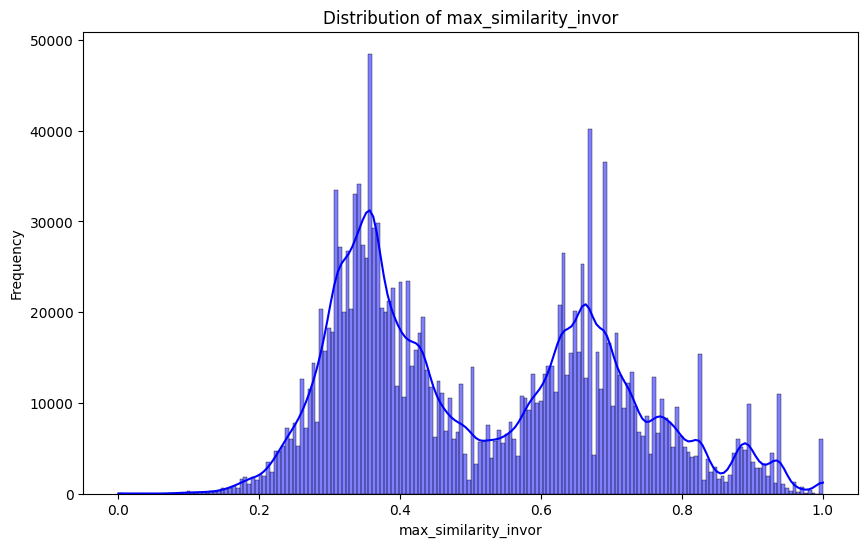

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制直方图
plt.figure(figsize=(10, 6))
sns.histplot(final_df['similarity_oree'], kde=True, color='blue')  # KDE曲线用于估计概率密度函数
plt.title('Distribution of max_similarity_invor')
plt.xlabel('max_similarity_invor')
plt.ylabel('Frequency')
plt.show()


In [7]:
# 计算大于0.80的样本数量
count_above_80 = (final_df['similarity_oree'] > 0.80).sum()
# 计算总样本数量
total_samples = final_df.shape[0]
# 计算大于0.80的样本占总样本的百分比
percentage_above_80 = (count_above_80 / total_samples) * 100
# 打印结果
print("Number of samples with 'max_similarity_eeAssignee' greater than 0.80:", count_above_80)
print("Percentage of total samples:", percentage_above_80, "%")


Number of samples with 'max_similarity_eeAssignee' greater than 0.80: 123129
Percentage of total samples: 7.48783589264571 %
